In [1]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")
db = client.test_database
collection = db.crypto_collection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import altair as alt

In [4]:
PRODUCT_ID = "ETH-USD"

In [5]:
collection.count()

211881

In [6]:
collection.count({"type":"ticker"})

1837

In [7]:
ticker = collection.find_one({"type":"ticker", "product_id":PRODUCT_ID})

In [8]:
ticker

{'_id': ObjectId('5f2d3948962d560df00c9ba5'),
 'type': 'ticker',
 'sequence': 9922849610,
 'product_id': 'ETH-USD',
 'price': '394.44',
 'open_24h': '394.24000000',
 'volume_24h': '150237.32444375',
 'low_24h': '391.00000000',
 'high_24h': '401.27000000',
 'volume_30d': '5288438.98779041',
 'best_bid': '394.40',
 'best_ask': '394.44',
 'side': 'buy',
 'time': '2020-08-07T11:21:40.903975Z',
 'trade_id': 61448885,
 'last_size': '0.12109596'}

In [9]:
list(ticker.keys())

['_id',
 'type',
 'sequence',
 'product_id',
 'price',
 'open_24h',
 'volume_24h',
 'low_24h',
 'high_24h',
 'volume_30d',
 'best_bid',
 'best_ask',
 'side',
 'time',
 'trade_id',
 'last_size']

In [10]:
df = pd.DataFrame.from_dict(collection.find({"type":"ticker"}))

In [11]:
df.head()

,_id,type,sequence,product_id,price,open_24h,volume_24h,low_24h,high_24h,volume_30d,best_bid,best_ask,side,time,trade_id,last_size
0,5f2d3948962d560df00c9ba1,ticker,2215518589,ETH-BTC,0.03352,0.03374000,21835.28768411,0.03337000,0.03384000,891625.19006849,0.03351,0.03352,buy,2020-08-07T11:21:13.238814Z,10094140,0.01621807
1,5f2d3948962d560df00c9ba3,ticker,4627012291,ETH-EUR,334.48,333.48000000,21498.18475812,330.21000000,338.75000000,827188.78290180,334.48,334.64,sell,2020-08-07T11:21:29.554511Z,10048940,0.02310305
2,5f2d3948962d560df00c9ba5,ticker,9922849610,ETH-USD,394.44,394.24000000,150237.32444375,391.00000000,401.27000000,5288438.98779041,394.40,394.44,buy,2020-08-07T11:21:40.903975Z,61448885,0.12109596
3,5f2d3949962d560df00c9baa,ticker,15589846670,BTC-USD,11765.25,11689.75000000,17288.89646029,11650.00000000,11920.00000000,372239.13121871,11765.24,11765.25,buy,2020-08-07T11:21:41.621160Z,99233142,0.00867865
4,5f2d3949962d560df00c9c03,ticker,9922849715,ETH-USD,394.45,394.24000000,150237.58257997,391.00000000,401.27000000,5288439.24592663,394.40,394.45,buy,2020-08-07T11:21:43.292671Z,61448886,0.25813622


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         1837 non-null   object
 1   type        1837 non-null   object
 2   sequence    1837 non-null   int64 
 3   product_id  1837 non-null   object
 4   price       1837 non-null   object
 5   open_24h    1837 non-null   object
 6   volume_24h  1837 non-null   object
 7   low_24h     1837 non-null   object
 8   high_24h    1837 non-null   object
 9   volume_30d  1837 non-null   object
 10  best_bid    1837 non-null   object
 11  best_ask    1837 non-null   object
 12  side        1837 non-null   object
 13  time        1837 non-null   object
 14  trade_id    1837 non-null   int64 
 15  last_size   1837 non-null   object
dtypes: int64(2), object(14)
memory usage: 229.8+ KB


In [13]:
df.price = df.price.astype(float)
df.open_24h = df.open_24h.astype(float)
df.volume_24h = df.volume_24h.astype(float)
df.low_24h = df.low_24h.astype(float)
df.high_24h = df.high_24h.astype(float)
df.volume_30d = df.volume_30d.astype(float)
df.best_bid = df.best_bid.astype(float)
df.best_ask = df.best_ask.astype(float)
df.trade_id = df.trade_id.astype(int)
df.time = pd.to_datetime(df.time)

In [14]:
#df.info()

In [15]:
#df.describe()

In [16]:
df.product_id.value_counts()

BTC-USD    926
ETH-USD    636
ETH-EUR    166
ETH-BTC    109
Name: product_id, dtype: int64

In [17]:
ether = df.loc[df.product_id == PRODUCT_ID,:]
type(ether)
#ether.info()

pandas.core.frame.DataFrame

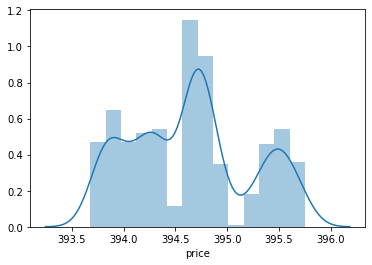

In [18]:
sns.distplot(ether.price)